<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Test Environment for Generative AI classroom labs

This lab provides a test environment for the codes generated using the Generative AI classroom.

Follow the instructions below to set up this environment for further use.


# Setup


### Install required libraries

In case of a requirement of installing certain python libraries for use in your task, you may do so as shown below.


In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

### Dataset URL from the GenAI lab
Use the URL provided in the GenAI lab in the cell below. 


In [2]:
URL = URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

### Downloading the dataset

Execute the following code to download the dataset in to the interface.

> Please note that this step is essential in JupyterLite. If you are using a downloaded version of this notebook and running it on JupyterLabs, then you can skip this step and directly use the URL in pandas.read_csv() function to read the dataset as a dataframe


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

---


# Test Environment


In [6]:
# Keep appending the code generated to this cell, or add more cells below this to execute in parts
import pandas as pd
file_path = 'dataset.csv'  # replace with your file path
df = pd.read_csv(file_path, header=0)
print(df.head(5))

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  


In [10]:
import numpy as np

# Identify columns with missing values
missing_values = df.isnull().sum()
print("Columns with missing values:")
print(missing_values)

# Replace missing values with mean of the column
for column in df.columns:
    if df[column].isnull().any() and df[column].dtype in [np.float64, np.int64]:  # Check if the column is numeric
        df[column].fillna(df[column].mean(), inplace=True)

# Delete duplicate entries
df = df.drop_duplicates()
print(df)

Columns with missing values:
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             3
mpg             0
engineSize      0
price           0
dtype: int64


<ipython-input-10-248b2eb73847>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


         model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0       Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1        Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2        Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3       Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4       Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
...        ...   ...          ...      ...      ...    ...   ...         ...   
17961    B-MAX  2017       Manual    16700   Petrol  150.0  47.1         1.4   
17962    B-MAX  2014       Manual    40700   Petrol   30.0  57.7         1.0   
17963    Focus  2015       Manual     7010   Diesel   20.0  67.3         1.6   
17964       KA  2018       Manual     5007   Petrol  145.0  57.7         1.2   
17965    Focus  2015       Manual     5007   Petrol   22.0  57.7         1.0   

       price  
0      12000  
1      14

In [12]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Get the correlation of each attribute with the target attribute ('price')
price_corr = correlation_matrix['price']

# Sort the correlations in descending order and exclude the target attribute itself
top_5_corr = price_corr.drop('price').sort_values(ascending=False).head(5)

# Print the top 5 attributes that have the highest correlation with price
print("Top 5 attributes with the highest correlation with price:")
print(top_5_corr)

Top 5 attributes with the highest correlation with price:
year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


In [13]:
# Replace 'attribute_name' with the actual column name
unique_counts = df['fuelType'].value_counts()

# Print the result
print("Number of entries for each unique value in 'fuelType':")
print(unique_counts)

Number of entries for each unique value in 'fuelType':
fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


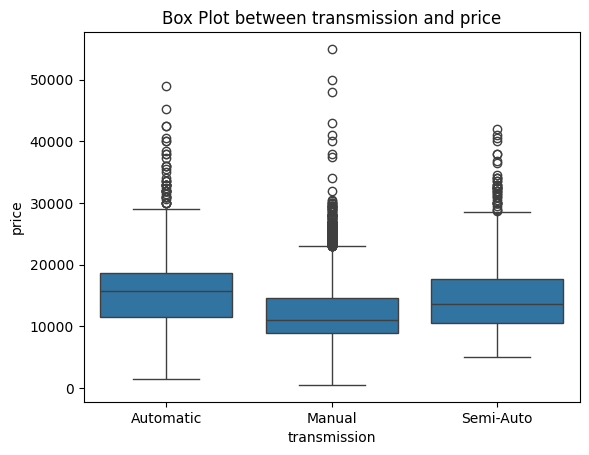

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame, 'source_attribute' is the categorical column,
# and 'target_attribute' is the continuous column you want to plot

# Create the box plot
sns.boxplot(x='transmission', y='price', data=df)

# Add title and labels (optional)
plt.title('Box Plot between transmission and price')
plt.xlabel('transmission')
plt.ylabel('price')

# Show the plot
plt.show()

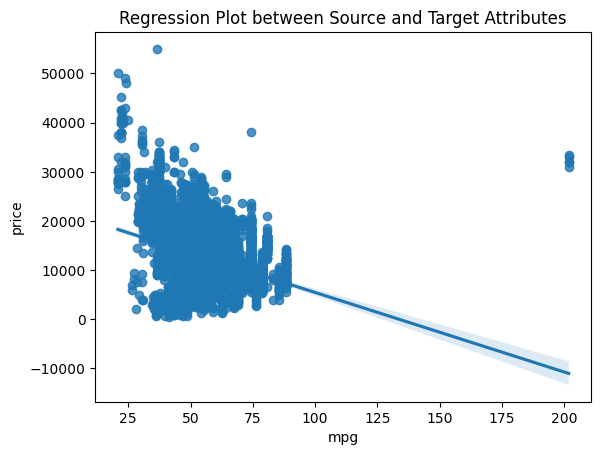

In [15]:
# Assuming 'df' is your DataFrame, 'source_attribute' is the independent variable (x),
# and 'target_attribute' is the dependent variable (y)

# Create the regression plot
sns.regplot(x='mpg', y='price', data=df)

# Add title and labels
plt.title('Regression Plot between Source and Target Attributes')
plt.xlabel('mpg')
plt.ylabel('price')

# Show the plot
plt.show()


R^2 value: 0.1198980224962416
Mean Squared Error (MSE): 19741690.809446193


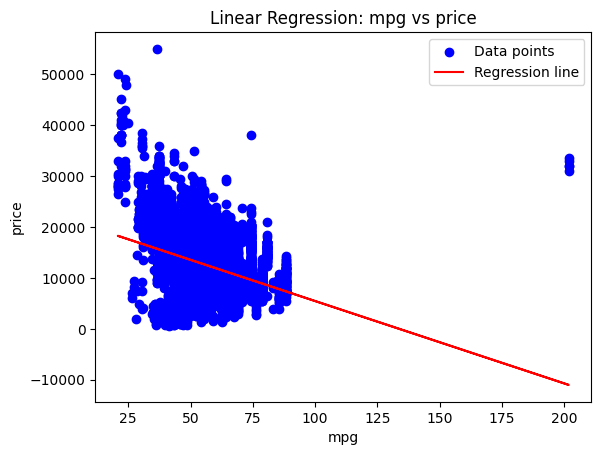

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame, 'source_attribute' is the independent variable (X),
# and 'target_attribute' is the dependent variable (y)

# Extract the source and target variables
X = df[['mpg']]  # Make sure it is a 2D array (even if it's one column)
y = df['price']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the target variable using the model
y_pred = model.predict(X)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print the R^2 and MSE values
print(f"R^2 value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Plotting the data and regression line (optional)
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.title('Linear Regression: mpg vs price')
plt.xlabel('mpg')
plt.ylabel('price')
plt.legend()
plt.show()

R^2 value: 0.7265379654547026
Mean Squared Error (MSE): 6134065.224381684


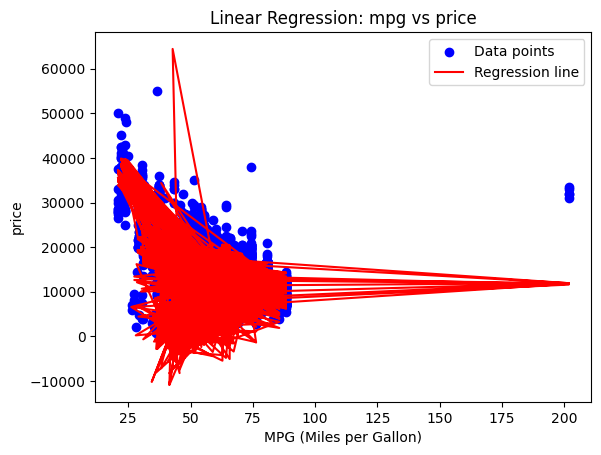

In [17]:
# Assuming 'df' is your DataFrame, 'source_attribute' is the independent variable (X),
# and 'target_attribute' is the dependent variable (y)

# Extract the source and target variables
X = df[['mpg', 'year', 'mileage', 'tax','engineSize']]  # Make sure it is a 2D array (even if it's one column)
y = df['price']

# Initialize the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict the target variable using the model
y_pred = model.predict(X)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Print the R^2 and MSE values
print(f"R^2 value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

# Plotting the data and regression line (optional)
plt.scatter(X['mpg'], y, color='blue', label='Data points')
plt.plot(X['mpg'], y_pred, color='red', label='Regression line')
plt.title('Linear Regression: mpg vs price')
plt.xlabel('MPG (Miles per Gallon)')
plt.ylabel('price')
plt.legend()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Example DataFrame (replace with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

X = df[['mpg', 'year', 'mileage', 'tax','engineSize']]  # Make sure it is a 2D array (even if it's one column)
y = df['price']

# Split the data into training and testing sets (optional, but recommended for evaluation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with StandardScaler, PolynomialFeatures (degree=2), and LinearRegression
pipeline = make_pipeline(
    StandardScaler(),                  # Standardize the features
    PolynomialFeatures(degree=2),       # Generate second-degree polynomial features
    LinearRegression()                 # Linear regression model
)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"R^2 value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 value: 0.1212280714717211
Mean Squared Error (MSE): 19704749.61492


In [20]:
from sklearn.linear_model import Ridge

X = df[['mpg', 'year', 'mileage', 'tax','engineSize']]  # Make sure it is a 2D array (even if it's one column)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model with regularization parameter alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit the Ridge regression model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions using the fitted model on the test data
y_pred = ridge_model.predict(X_test)

# Calculate R^2 (coefficient of determination) for the model on test data
r2 = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE) for the model on test data
mse = mean_squared_error(y_test, y_pred)

# Print the results
print(f"R^2 value: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 value: 0.6917134446113165
Mean Squared Error (MSE): 6912725.801054866


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

X = df[['mpg', 'year', 'mileage', 'tax','engineSize']]  # Make sure it is a 2D array (even if it's one column)
y = df['price']

# Veriyi eğitim (%80) ve test (%20) verisi olarak ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Dereceden polinom özellikleri oluşturacak PolynomialFeatures nesnesi
polynomial = PolynomialFeatures(degree=2)

# Ridge regresyon modeli
ridge_model = Ridge(alpha=0.1)

# Pipeline oluşturma: Standartlaştırma -> Polinom özellikler -> Ridge regresyon
model_pipeline = make_pipeline(StandardScaler(), polynomial, ridge_model)

# Modeli eğitim verisi ile eğitme
model_pipeline.fit(X_train, y_train)

# Test verisi üzerinde tahminler yapma
y_pred = model_pipeline.predict(X_test)

# Test verisi üzerinde R^2 değerini hesaplama
r2 = r2_score(y_test, y_pred)

# Test verisi üzerinde Mean Squared Error (MSE) değerini hesaplama
mse = mean_squared_error(y_test, y_pred)

# Sonuçları yazdırma
print(f"R^2 değeri: {r2}")
print(f"Mean Squared Error (MSE): {mse}")

R^2 değeri: 0.12127336883244477
Mean Squared Error (MSE): 19703733.90979527


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Örnek DataFrame (gerçek veri setinizle değiştirin)
# df = pd.read_csv('veri_setiniz.csv')

# Aşağıdaki özellikler ve hedef değişken isimlerini kendi veri setinize göre değiştirebilirsiniz
X = df[['mpg', 'year', 'mileage', 'tax','engineSize']]  # Make sure it is a 2D array (even if it's one column)
y = df['price']

# Bağımsız değişkenler (özellikler) ve bağımlı değişkeni (hedef) ayıklayın
X = df[source_variables]  # Bağımsız değişkenler
y = df[target_variable]  # Bağımlı değişken (hedef)

# Veriyi eğitim (%80) ve test (%20) verisi olarak ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Dereceden polinom özellikleri oluşturacak PolynomialFeatures nesnesi
polynomial = PolynomialFeatures(degree=2)

# Ridge regresyon modeli
ridge_model = Ridge()

# Pipeline oluşturma: Standartlaştırma -> Polinom özellikler -> Ridge regresyon
model_pipeline = make_pipeline(StandardScaler(), polynomial, ridge_model)

# Parametre grid'i, alpha için farklı değerleri içeriyor
param_grid = {'ridge__alpha': [0.01, 0.1, 1, 10, 100]}

# GridSearchCV kullanarak çapraz doğrulama ile en iyi alpha değerini bulma
grid_search = GridSearchCV(model_pipeline, param_grid, cv=4, scoring='neg_mean_squared_error')

# Modeli eğitim verisi ile eğitme
grid_search.fit(X_train, y_train)

# En iyi parametreyi yazdırma
print(f"En iyi alpha değeri: {grid_search.best_params_['ridge__alpha']}")

# En iyi model ile test verisi üzerinde tahminler yapma
y_pred = grid_search.predict(X_test)

# Test verisi üzerinde R^2 değerini hesaplama
r2 = r2_score(y_test, y_pred)

# Test verisi üzerinde Mean Squared Error (MSE) değerini hesaplama
mse = mean_squared_error(y_test, y_pred)

# Sonuçları yazdırma
print(f"R^2 değeri: {r2}")
print(f"Mean Squared Error (MSE): {mse}")


## Authors


[Abhishek Gagneja](https://www.linkedin.com/in/abhishek-gagneja-23051987/)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-12-10|0.1|Abhishek Gagneja|Initial Draft created|


Copyright © 2023 IBM Corporation. All rights reserved.
